In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/philipbonner/nltk_data...


In [2]:
# Read your api key environment variable
load_dotenv("NEWS_API_KEY.env")
API_key = os.getenv("NEWS_API_KEY")

# Check if API_key loaded correctly through the len function
print(len(API_key))

32


In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
news_api_key = NewsApiClient(api_key=API_key)

In [4]:
# Fetch the Bitcoin news articles (Bitcoin varirable: btc_articles)
btc_articles = news_api_key.get_everything(q = "Bitcoin OR bitcoin OR BTC OR btc", 
                                           language = "en", 
                                           page_size = 100, 
                                           sort_by = "relevancy")

# Show sample Bitcoin article 
btc_articles['articles'][0]

# Print the total amount of Bitcoin articles 
print(f"The total number of articles about Bitcoin are {btc_articles['totalResults']}")

The total number of articles about Bitcoin are 4021


In [5]:
# Fetch the Ethereum news articles (Ethereum variable: eth_articles)
eth_articles = news_api_key.get_everything(q = "Ethereum OR ethereum OR ETH OR eth", 
                                           language = "en", 
                                           page_size = 100, 
                                           sort_by = "relevancy")

# Show sample Ethereum article
eth_articles['articles'][0]

# Print the total amount of Ethereum articles 
print(f"The total number of articles about Ethereum are {eth_articles['totalResults']}")

The total number of articles about Ethereum are 1921


In [10]:
bitcoin_sentiment = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        btc_sentiment.append({
            "text": text, 
            "date": date, 
            "compound": compound, 
            "positive": pos, 
            "negative": neg, 
            "neutral": neu
        })

    except AttributeError:
        pass

# Create a Bitcoin dataframe (varirable: btc_df)
btc_df = pd.DataFrame(btc_sentiment)

# Re-order btc_df columns
columns = ["compound", "negative", "neutral", "positive", "text", "date"]
btc_df = btc_df[columns]

# Display the df
btc_df.head()

,compound,negative,neutral,positive,text,date
0,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-20
1,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,2020-09-10
2,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,2020-08-19
3,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,2020-09-02
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-21


In [11]:
# Create the Ethereum sentiment scores DataFrame (Ethereum sentiment = ethereum_sentiment)
ethereum_sentiment = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

eth_df = pd.DataFrame(eth_sentiment)


columns = ["compound", "negative", "neutral", "positive", "text", "date"]
eth_df = eth_df[columns]


eth_df.head()

,compound,negative,neutral,positive,text,date
0,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",2020-09-18T14:00:00Z
1,0.2500,0.0,0.933,0.067,A team of researchers from the University of B...,2020-08-24T19:24:42Z
2,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,2020-09-02T16:00:00Z
3,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,2020-09-07T09:04:23Z
4,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,2020-08-26T06:07:00Z


In [9]:
#Bitcoin sentiment analysis below

In [13]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,190.000000,190.000000,190.000000,190.000000
mean,0.159013,0.041274,0.885905,0.072821
std,0.435340,0.069539,0.079481,0.055373
min,-0.938200,0.000000,0.588000,0.000000
25%,0.000000,0.000000,0.837000,0.007250
50%,0.271400,0.000000,0.910000,0.080000
75%,0.507000,0.074750,0.924750,0.090000
max,0.790100,0.347000,1.000000,0.210000


In [ ]:
#Ethereum Sentiment analysis below

In [15]:
# Describe the ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,190.000000,190.000000,190.000000,190.000000
mean,0.119911,0.037137,0.897337,0.065516
std,0.393176,0.063364,0.091357,0.068570
min,-0.908100,0.000000,0.607000,0.000000
25%,0.000000,0.000000,0.828750,0.000000
50%,0.025800,0.000000,0.918000,0.059000
75%,0.401900,0.061750,1.000000,0.094500
max,0.897900,0.347000,1.000000,0.311000


In [16]:
#Tokenizer

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philipbonner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/philipbonner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/philipbonner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    # tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [24]:
# Create a new tokens column for Bitcoin

btc_df['tokens'] = [tokenizer(text) for text in btc_df['text']]

# Display the df
btc_df.tail()

,compound,negative,neutral,positive,text,date,tokens
185,0.6124,0.000,0.865,0.135,MicroStrategy is prepared to HODL its bitcoin ...,2020-09-15,"[microstrategy, prepared, hodl, bitcoin, least..."
186,0.1012,0.066,0.856,0.077,While open positions in bitcoin (BTC) options ...,2020-08-21,"[open, position, bitcoin, btc, option, risen, ..."
187,0.3400,0.065,0.769,0.166,Bitcoin (BTC) may soon extend Wednesdays price...,2020-09-03,"[bitcoin, btc, may, soon, extend, wednesdays, ..."
188,0.1779,0.000,0.946,0.054,Bitcoin had a lackluster August while Ethereum...,2020-09-02,"[bitcoin, lackluster, august, ethereum, gas, f..."
189,-0.4215,0.130,0.791,0.079,Bitcoin exchange reserves have fallen to a 21-...,2020-08-18,"[bitcoin, exchange, reserve, fallen, month, lo..."


In [28]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(text) for text in eth_df['text']]

# Display the df
eth_df.tail()

,compound,negative,neutral,positive,text,date,tokens
185,0.6666,0.0,0.846,0.154,"Pornhub will accept BTC and LTC payments, a no...",2020-09-03T16:21:14Z,"[pornhub, accept, btc, ltc, payment, nonprofit..."
186,0.6249,0.0,0.831,0.169,CSE: VYGR OTCQB: VYGVFBorse Frankfurt: UCD2\r\...,2020-08-27T06:00:00Z,"[cse, vygr, otcqb, vygvfborse, frankfurt, ucdu..."
187,0.5719,0.0,0.893,0.107,JF Ptak Science Books Post 1210\r\n This wo...,2020-08-23T10:07:25Z,"[jf, ptak, science, books, post, wonderful, cu..."
188,0.8979,0.0,0.733,0.267,Courtesy of Harvard GSD\r\nThe Best Architectu...,2020-08-27T04:30:00Z,"[courtesy, harvard, gsdthe, best, architecture..."
189,0.0000,0.0,1.000,0.000,© John Horner\r\nThe Times Higher EducationWor...,2020-09-08T05:00:00Z,"[john, hornerthe, times, higher, educationworl..."


In [26]:
#Ngrams and Frequency analysis

In [29]:
from collections import Counter
from nltk import ngrams

In [30]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = []
for list in btc_df.tokens:
    btc_ngrams += list 

btc_bigram_count = Counter(ngrams(btc_ngrams, n=2))
print(dict(btc_bigram_count.most_common(10)))

{('satoshi', 'nakaboto'): 88, ('bitcoin', 'btc'): 54, ('robot', 'colleague'): 44, ('colleague', 'satoshi'): 44, ('nakaboto', 'writes'): 44, ('writes', 'bitcoin'): 44, ('every', 'fucking'): 44, ('fucking', 'daywelcome'): 44, ('daywelcome', 'another'): 44, ('another', 'edition'): 44}


In [31]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = []
for list in eth_df.tokens:
    eth_ngrams += list 

eth_bigram_count = Counter(ngrams(eth_ngrams, n=2))
print(dict(eth_bigram_count.most_common(10)))

{('btc', 'trading'): 16, ('trading', 'around'): 16, ('char', 'ethereum'): 16, ('around', 'utc'): 16, ('ether', 'eth'): 16, ('decentralized', 'finance'): 14, ('char', 'bitcoin'): 14, ('utc', 'pm'): 14, ('pm', 'et'): 14, ('decentralized', 'exchange'): 10}


In [33]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [34]:
# Get the top 10 words for Bitcoin
token_count(btc_ngrams)

[('bitcoin', 202),
 ('char', 190),
 ('satoshi', 88),
 ('nakaboto', 88),
 ('btc', 68),
 ('today', 52),
 ('every', 48),
 ('another', 46),
 ('edition', 46),
 ('going', 46)]

In [35]:
# Get the top 10 words for Ethereum
token_count(eth_ngrams)

[('char', 190),
 ('ethereum', 92),
 ('ha', 54),
 ('eth', 44),
 ('bitcoin', 42),
 ('ether', 32),
 ('price', 28),
 ('decentralized', 26),
 ('new', 24),
 ('btc', 24)]

In [36]:
#Word Clouds

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

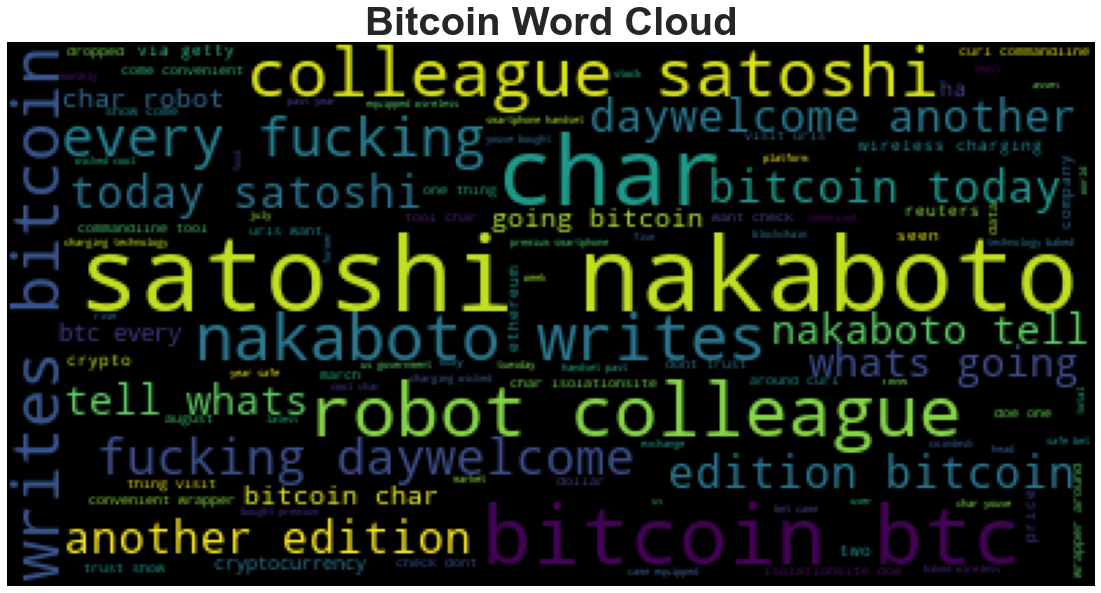

In [38]:
# Generate the Bitcoin word cloud
btc_big_string = ' '.join(btc_ngrams)
word_cloud = WordCloud().generate(btc_big_string)
plt.axis("off")
plt.title("Bitcoin Word Cloud", {"fontsize":40, "fontweight": "bold"})
plt.imshow(word_cloud)

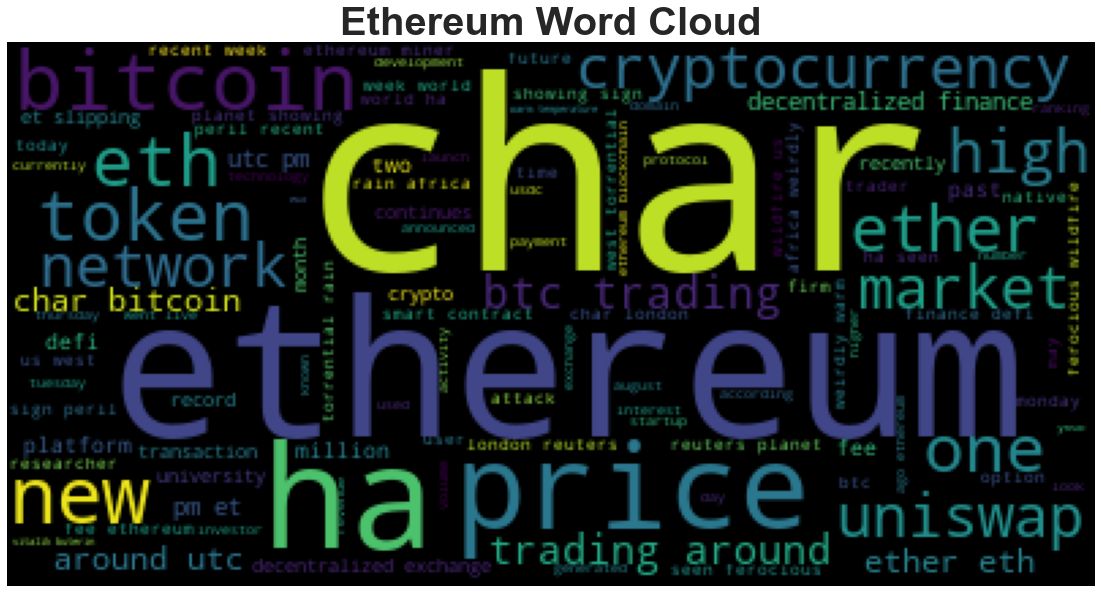

In [39]:
# Generate the Ethereum word cloud
eth_big_string = ' '.join(eth_ngrams)
word_cloud = WordCloud().generate(eth_big_string)
plt.axis("off")
plt.title("Ethereum Word Cloud", {"fontsize":40, "fontweight": "bold"})
plt.imshow(word_cloud)

In [40]:
#Named Entity Recognition

In [41]:
import spacy
from spacy import displacy

In [42]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [43]:
# Concatenate all of the Bitcoin text together
all_btc_corpus = ' '.join(btc_df['text'])

In [46]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_corpus)

# Add a title to the document
btc_doc.user_data['title'] = "Bitcoin Article"

In [47]:
# Render the visualization
displacy.render(btc_doc, style = 'ent')

In [48]:
# List all Entities for Bitcoin
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
B

In [49]:
# Concatenate all of the Ethereum text together
all_eth_corpus = ' '.join(eth_df['text'])

In [50]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_corpus)

# Add a title to the document
eth_doc.user_data['title'] = "Ethereum NER"

In [51]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [52]:
# List all Entities for Ethereum
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

September DATE
18 DATE
2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
the University of British Columbia ORG
Princeton University ORG
the University of California, Berkeley ORG
the Singapore-ETH Centre ORG
the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
LONDON GPE
Reuters ORG
about 20% PERCENT
NEW YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
U.S. GPE
today DATE
two CARDINAL
Russian NORP
nearly $17 million MONEY
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Ethereum ORG
Mateusz Slodkowski/ PERSON
Mars LOC
every five hours TIME
Mars LOC
Earth LOC
September DATE
16 DATE
2020 DATE
6 min QUANTITY
the past few months DATE
working dynamics ORG
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
DeFi ORG
Bankless YouTube ORG
Tuesday DATE
Mariano C